<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Driver_Gaze_Zone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#imported necessary packages and libraries
import matplotlib.pyplot as plt
from skimage import io, color
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Sequential
from keras import models
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from keras import regularizers
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
#path of train and test data
# train_path = '/content/drive/MyDrive/gaze_dataset/train'
# test_path = '/content/drive/MyDrive/gaze_dataset/test'

In [9]:
# #path of raveling, non revaling and test data
# Centerstack_data = '/content/drive/MyDrive/gaze_dataset/train/Centerstack'
# Forward_data = '/content/drive/MyDrive/gaze_dataset/train/Forward'
# Left_wm_data = '/content/drive/MyDrive/gaze_dataset/train/Left_wing_mirror'
# Rearview_data = '/content/drive/MyDrive/gaze_dataset/train/Rearview_mirror'
# Right_wm_data = '/content/drive/MyDrive/gaze_dataset/train/Right_wing_mirror'
# test_data = '/content/drive/MyDrive/gaze_dataset/test'

In [10]:
# list_cs = os.listdir(Centerstack_data)
# list_f = os.listdir(Forward_data)
# list_lwm = os.listdir(Left_wm_data)
# list_rv = os.listdir(Rearview_data)
# list_rwm = os.listdir(Right_wm_data)
# list_test = os.listdir(test_data)

In [26]:
#Reading the data
data_dir = '/content/drive/MyDrive/gaze_dataset/train'


BATCH_SIZE = 32
# IMG_SIZE = (256, 256, 3)

#creating training data
train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            )

Found 2505 files belonging to 5 classes.


In [27]:
#creating validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=8)

Found 2505 files belonging to 5 classes.
Using 501 files for validation.


In [28]:
# Apply data augmentation
img_height = 240
img_width = 240
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [29]:
#normalizing the data
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))

#auto tuning the data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
#extracting inputs and labels from the data
image, labels = next(iter(train_ds))

In [49]:
IMG_SIZE = 240

#reshaping and rescaling the images
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [50]:
# Applying data augmentation
img_height = 240
img_width = 240
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [106]:
num_classes = 5
# model = tf.keras.Sequential([
  
#   resize_and_rescale,
#   data_augmentation,
#   tf.keras.layers.BatchNormalization(),
#   tf.keras.layers.Conv2D(64, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Dropout((0.2)),
#   tf.keras.layers.BatchNormalization(),
  
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.BatchNormalization(),
#   tf.keras.layers.Dense(num_classes,activation = 'softmax')
# ])
for i in range(100):
  reg=10**(np.random.uniform(-4,0)) 


#defining the model
model=tf.keras.Sequential()
# model.add(resize_and_rescale)
# model.add(data_augmentation)

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(reg)))

model.add(layers.Dense(5,activation='sigmoid',kernel_regularizer=regularizers.l2(reg)))


#compiling the model
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

#training the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


79/79 [==============================] - 15s 171ms/step - loss: 20.0869 - acc: 0.1988 - val_loss: 3.6401 - val_acc: 0.1956
Epoch 2/50
79/79 [==============================] - 13s 168ms/step - loss: 3.5028 - acc: 0.2044 - val_loss: 3.3747 - val_acc: 0.2036
Epoch 3/50
79/79 [==============================] - 13s 168ms/step - loss: 3.2761 - acc: 0.2048 - val_loss: 3.1817 - val_acc: 0.2096
Epoch 4/50
79/79 [==============================] - 13s 168ms/step - loss: 3.1118 - acc: 0.1936 - val_loss: 3.0386 - val_acc: 0.1996
Epoch 5/50
79/79 [==============================] - 13s 168ms/step - loss: 2.9730 - acc: 0.2100 - val_loss: 2.9090 - val_acc: 0.2236
Epoch 6/50
79/79 [==============================] - 13s 167ms/step - loss: 2.8680 - acc: 0.1908 - val_loss: 2.8165 - val_acc: 0.2036
Epoch 7/50
79/79 [==============================] - 14s 177ms/step - loss: 2.7713 - acc: 0.1824 - val_loss: 2.7257 - val_acc: 0.2036
Epoch 8/50
79/79 [==============================] - 13s 167ms/step - loss: 2.68

Minimum Validation Loss: 1.7342


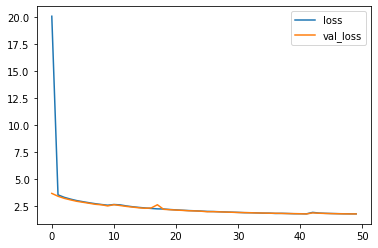

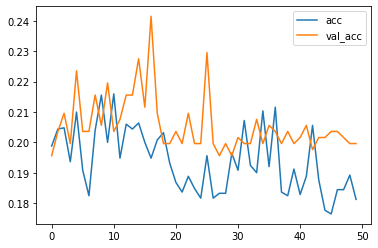

In [109]:
# plotting training history
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['acc', 'val_acc']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [95]:
test_data = "/content/drive/MyDrive/gaze_dataset/Test folder" #test data set path

In [96]:
# train_dataset = tf.keras.utils.image_dataset_from_directory(test_data,
#                                                             shuffle=True
#                                                             )

In [97]:
#predicting on test data X_pred
# y_pred = model.predict(val_ds)
# y_output = []

In [98]:
# y_pred[0]

In [99]:
# result = np.where(y_pred[0] == np.amax(y_pred[0]))
# print(result[0][0])

In [100]:
#creating a dictionary whose filename consists of name of test images and class consists of the pridected class
t = "/content/drive/MyDrive/gaze_dataset/test"

dicti = {}
dicti['filename'] = []
dicti['class'] = []

for f in os.listdir(t):
  ip = os.path.join(t,f)

  
  image = tf.keras.preprocessing.image.load_img(ip,target_size=(256,256))
  input = tf.keras.preprocessing.image.img_to_array(image)
  input = np.array([input])  # Convert single image to a batch.
  predictions = model.predict(input)

  dicti['filename'].append(f)
  result = np.argmax(predictions,axis = 1)[0]
  if(result == 4):
    dicti['class'].append("Right_wing_mirror")
  elif(result == 3):
    dicti['class'].append("Rearview_mirror")
  elif(result == 2):
    dicti['class'].append("Left_wing_mirror")
  elif(result == 1):
    dicti['class'].append("Forward")
  else:
    dicti['class'].append("Centerstack")

In [101]:
#converting dictonary to data frame
df = pd.DataFrame.from_dict(dicti)

In [104]:
df.head(10)

,filename,class
0,158.jpg,Rearview_mirror
1,164.jpg,Rearview_mirror
2,2.jpg,Right_wing_mirror
3,358.jpg,Forward
4,132.jpg,Rearview_mirror
5,354.jpg,Left_wing_mirror
6,415.jpg,Rearview_mirror
7,280.jpg,Rearview_mirror
8,431.jpg,Right_wing_mirror
9,116.jpg,Centerstack


In [103]:
#saving csv file in drive
df.to_csv("OutputM.csv", index = False)
!cp OutputM.csv "drive/My Drive/"

In [ ]:
# for i in range(len(y_pred)):
#   result = np.where(y_pred[0] == np.amax(y_pred[0]))
  
  # if(result == 0):
  #   y_output.append("Right_wing_mirror")
  # if(result == 1):
  #   y_output.append("Rearview_mirror")
  # if(result == 2):
  #   y_output.append("Left_wing_mirror")
  # if(result == 3):
  #   y_output.append("Forward")
  # else:
  #   y_output.append("Centerstack")

In [ ]:
# y_output

In [ ]:
# print(len(list_test))
# print(len(y_output))

509
501


In [107]:
# stored non raveling image array in img_nr
# img_cs = []
# for i in range(len(list_cs)):
#   img = io.imread(os.path.join(Centerstack_data,
#                                list_cs[i]))
#   img_cs.append(np.array(img))
#   io.imshow(img)

# img_f = []
# for i in range(len(list_f)):
#   img = io.imread(os.path.join(Forward_data,
#                                list_f[i]))
#   img_f.append(np.array(img))
#   io.imshow(img)

# img_lwm = []
# for i in range(len(list_lwm)):
#   img = io.imread(os.path.join(Left_wm_data,
#                                list_lwm[i]))
#   img_lwm.append(np.array(img))
#   io.imshow(img)

# img_rv = []
# for i in range(len(list_rv)):
#   img = io.imread(os.path.join(Rearview_data,
#                                list_rv[i]))
#   img_rv.append(np.array(img))
#   io.imshow(img)

# #stored raveling image array in img_r 
# img_rwm = []
# for i in range(len(list_rwm)):
#   img = io.imread(os.path.join(Right_wm_data,
#                                list_rwm[i]))
#   img_rwm.append(np.array(img))
#   io.imshow(img)

# #stored test image array in img_test
# img_test = []
# for i in range(len(list_test)):
#   img = io.imread(os.path.join(test_data,
#                                list_test[i]))
#   img_test.append(np.array(img))
#   io.imshow(img)

In [ ]:
# y_cs=np.empty(500)
# y_cs.fill(0)

# y_f=np.empty(500)
# y_f.fill(1)

# y_lwm=np.empty(500)
# y_lwm.fill(2)

# y_rv=np.empty(500)
# y_rv.fill(3)

# y_rwm=np.empty(500)
# y_rwm.fill(4)

# y = np.concatenate((y_cs, y_f, y_lwm, y_rv, y_rwm), axis = 0)

In [ ]:
# perms = np.random.permutation(2500)

In [ ]:
# X = np.concatenate((img_cs, img_f, img_lwm, img_rv, img_rwm), axis = 0)

In [ ]:
# X = X[perms]
# y = y[perms]